In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, LSTM
from keras.layers import MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt

In [2]:
train_dir = 'output (more)/train'
val_dir = 'output (more)/test'

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=24,
    color_mode="grayscale",
    class_mode='categorical',
)


Found 1968 images belonging to 41 classes.


In [6]:
test_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=6,
    color_mode="grayscale",
    class_mode='categorical'
)


Found 492 images belonging to 41 classes.


In [7]:
model = Sequential()


In [8]:
model.add(Conv2D(32, (3, 3),
          activation='relu', input_shape=(128, 128, 1)))



In [9]:
model.add(MaxPooling2D(pool_size=(2, 2)))


In [10]:
model.add(Conv2D(32, (3, 3), padding="same",
          activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


In [11]:
model.add(Flatten())


In [12]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.40))

model.add(Dense(96, activation='relu'))
model.add(Dropout(0.40))

model.add(Dense(64, activation='relu'))
model.add(Dense(41, activation='softmax'))

In [13]:
model.compile(optimizer='adam', 
            loss='categorical_crossentropy',
            metrics=['accuracy'])


In [14]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [15]:
history = model.fit(train_generator,
                    epochs=75,
                    validation_data=test_generator)


Epoch 1/75
82/82 [==============================] - 115s 1s/step - loss: 3.7105 - accuracy: 0.0325 - val_loss: 3.5786 - val_accuracy: 0.0488
Epoch 2/75
82/82 [==============================] - 97s 1s/step - loss: 3.3261 - accuracy: 0.0645 - val_loss: 2.7736 - val_accuracy: 0.1870
Epoch 3/75
82/82 [==============================] - 105s 1s/step - loss: 2.7622 - accuracy: 0.1474 - val_loss: 1.8446 - val_accuracy: 0.4431
Epoch 4/75
82/82 [==============================] - 106s 1s/step - loss: 2.2187 - accuracy: 0.2724 - val_loss: 1.1789 - val_accuracy: 0.6382
Epoch 5/75
82/82 [==============================] - 103s 1s/step - loss: 1.7928 - accuracy: 0.3984 - val_loss: 0.9239 - val_accuracy: 0.7033
Epoch 6/75
82/82 [==============================] - 106s 1s/step - loss: 1.5245 - accuracy: 0.4695 - val_loss: 0.6764 - val_accuracy: 0.8089
Epoch 7/75
82/82 [==============================] - 104s 1s/step - loss: 1.3663 - accuracy: 0.5081 - val_loss: 0.6607 - val_accuracy: 0.7683
Epoch 8/75
82/

In [16]:
model_json = model.to_json()
with open("model_new.json", "w") as json_file:
    json_file.write(model_json)
print('Model Saved')
model.save_weights('model_updated.h5')
print('Weights saved')


Model Saved
Weights saved


In [17]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


Visualizing loss

Text(0.5, 1.0, 'Loss Curves')

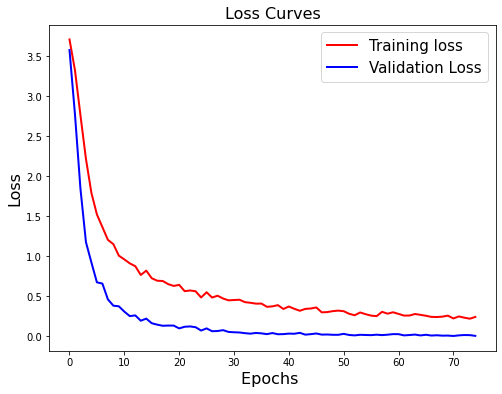

In [18]:
plt.figure(figsize=[8, 6])
plt.plot(history.history['loss'], 'r', linewidth=2.0)
plt.plot(history.history['val_loss'], 'b', linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'], fontsize=15)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)


Visualizing accuracy

Text(0.5, 1.0, 'Accuracy Curves')

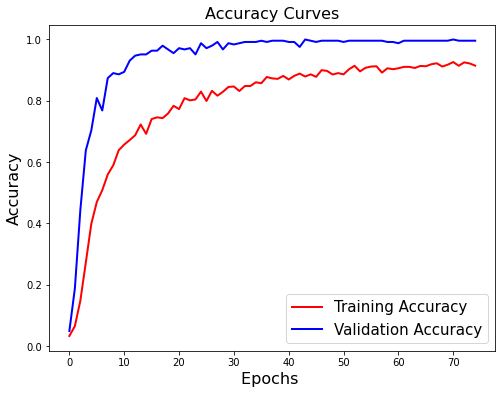

In [19]:
plt.figure(figsize=[8, 6])
plt.plot(history.history['accuracy'], 'r', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'b', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=15)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)
